In [8]:
import nltk
import random
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import re
from bs4 import BeautifulSoup

# from nltk.stem.snowball import SnowballStemmer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

data = None
with open('softwareengineering.txt', 'r', encoding='UTF-8') as data_file:
    data = data_file.read()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kieth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kieth\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
# Clean data
try:
    cleaned_data = ''
    cleaned_data_lines = data.splitlines()
    is_new_document = True
    for i, line in enumerate(cleaned_data_lines):
        if is_new_document:
            is_new_document = False
            continue
        if not line:
            is_new_document = True
            cleaned_data += '\n'
            continue
        cleaned_data += line
    soup = BeautifulSoup(cleaned_data, features='html.parser')
    text = soup.get_text()
    lines = (line.strip() for line in text.splitlines())
    chunks = (phrase.strip() for line in lines for phrase in line.split('  '))
    data = '\n'.join(chunk for chunk in chunks if chunk)
except:
    print('Something went wrong!')


In [10]:
# Filter out words that ends with symbols

def list_filter(x):
    blacklist = ['.', '-', ':']
    for c in blacklist:
        if c in x:
            return False
    result = re.compile('\\w+[^1-9\\.\\-\\s]').match(x)
    if result == None:
        return False
    # return True
    if result.start() == 0:
        return True
    return False

In [11]:
output = list(set(nltk.word_tokenize(data)))
output.sort()
word_list = output
word_list = list(filter(list_filter, word_list))
# display(word_list)

In [12]:
# TBC (Stemming)
stemmer = nltk.stem.snowball.SnowballStemmer('english')
stem = []
for word in word_list:
    stem.append(stemmer.stem(word))
# display(stem)

In [13]:
# Sentence Segmentation
sentences = nltk.sent_tokenize(data)
distribution = {
    'sentence_length': [],
    'num_sentences': []
}
for sentence in sentences:
    sentence_length = len(nltk.word_tokenize(sentence))
    index = None
    try:
        index = distribution['sentence_length'].index(sentence_length)
        distribution['num_sentences'][index] += 1
    except:
        distribution['sentence_length'].append(sentence_length)
        distribution['num_sentences'].append(1)        

In [14]:
distribution_tuples = []
for i in range(len(distribution['sentence_length'])):
    distribution_tuples.append((distribution['sentence_length'][i],distribution['num_sentences'][i]))
distribution_tuples.sort(key=lambda x: x[0])
# distribution_tuples

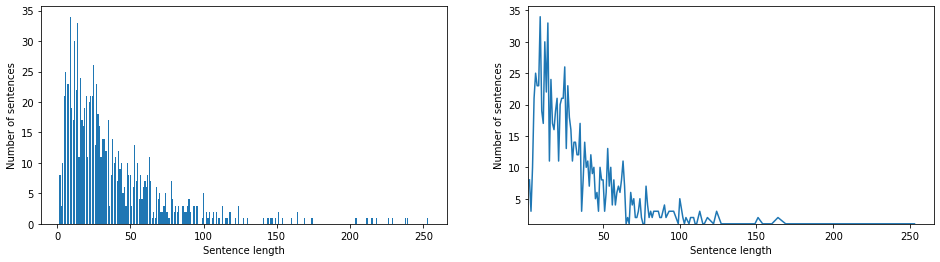

131


In [15]:
truncated_tuples = [m_tuple for m_tuple in distribution_tuples if m_tuple[1]]

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
# fig = plt.figure()
# plt.add_axes([0,0,1,1])
zipped = [*zip(*truncated_tuples)]
plt.bar(zipped[0],zipped[1])
plt.ylabel('Number of sentences')
plt.xlabel('Sentence length')
# plt.show()

plt.subplot(1,2,2)
# plt.figure()
plt.plot(*zip(*truncated_tuples))
# plt.margins(0)
plt.ylabel('Number of sentences')
plt.xlabel('Sentence length')
plt.ylim(ymin=1)
plt.xlim(xmin=1)
plt.show()

print(len(distribution_tuples))


In [16]:

# distribution_tuples
mydf = pd.DataFrame({"sentence_length":zipped[0], "no_sentences":zipped[1]})
mydf.describe()

,sentence_length,no_sentences
count,131.000000,131.000000
mean,79.038168,7.534351
std,59.188279,7.849839
min,2.000000,1.000000
25%,34.500000,1.500000
50%,67.000000,4.000000
75%,106.500000,11.000000
max,253.000000,34.000000


In [17]:
# POS Tagging
selected_sentences = random.sample(sentences, 3)
for sentence in selected_sentences:
    print(sentence)
    print(nltk.pos_tag(nltk.word_tokenize(sentence)))
    print()
    print()

At most, we can say it is written in English, or more precisely, in a specific jargon of English, a semi-format subset of English extended with logic notation.Different specifications are written in different styles, here is an example of some specifications:The Java Language SpecificationThe Scala Language SpecificationThe Haskell 2010 Language ReportThe Revised7 Report on the Algorithmic Language SchemeThe ECMA-262 ECMAScript® Language SpecificationPython does not really have a single Language Specification like many other languages do, the information is kind of splintered between the Python Language Reference, the Python Enhancement Proposals, as well as a lot of implicit institutional knowledge that only exists in the collective heads of the Python communityThere are multiple Python implementations in common use today, and only one of them is written in C:Brython is written in ECMAScriptIronPython is written in C#Jython is written in JavaGraalPython is written in Java, using the T